In [1]:

from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
bc.target.shape

(569,)

In [4]:
bc.target[500]

np.int64(1)

In [5]:
bc.data.shape

(569, 30)

In [6]:
bc.data[500]

array([1.504e+01, 1.674e+01, 9.873e+01, 6.894e+02, 9.883e-02, 1.364e-01,
       7.721e-02, 6.142e-02, 1.668e-01, 6.869e-02, 3.720e-01, 8.423e-01,
       2.304e+00, 3.484e+01, 4.123e-03, 1.819e-02, 1.996e-02, 1.004e-02,
       1.055e-02, 3.237e-03, 1.676e+01, 2.043e+01, 1.097e+02, 8.569e+02,
       1.135e-01, 2.176e-01, 1.856e-01, 1.018e-01, 2.177e-01, 8.549e-02])

# Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [8]:
print(f"Feature => Train: {X_train.shape} - Test: {X_test.shape}")
print(f"Label => Train: {y_train.shape} - Test: {y_test.shape}")

Feature => Train: (455, 30) - Test: (114, 30)
Label => Train: (455,) - Test: (114,)


In [9]:
X_train[0]

array([1.442e+01, 1.977e+01, 9.448e+01, 6.425e+02, 9.752e-02, 1.141e-01,
       9.388e-02, 5.839e-02, 1.879e-01, 6.390e-02, 2.895e-01, 1.851e+00,
       2.376e+00, 2.685e+01, 8.005e-03, 2.895e-02, 3.321e-02, 1.424e-02,
       1.462e-02, 4.452e-03, 1.633e+01, 3.086e+01, 1.095e+02, 8.264e+02,
       1.431e-01, 3.026e-01, 3.194e-01, 1.565e-01, 2.718e-01, 9.353e-02])

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
X_train[0]

array([0.36755769, 0.34020967, 0.36649555, 0.23688583, 0.40525413,
       0.32436135, 0.21996251, 0.29020875, 0.41363636, 0.2935973 ,
       0.1273703 , 0.32947313, 0.15698633, 0.08863032, 0.21388993,
       0.20051371, 0.08386364, 0.26974806, 0.12576057, 0.12121233,
       0.33333333, 0.5021322 , 0.33031472, 0.19748676, 0.47500495,
       0.30407219, 0.25511182, 0.53909749, 0.22728169, 0.32629705])

# Classification

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test):
  acc_train = accuracy_score(y_true=y_train, y_pred=y_pred_train)
  acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

  p = precision_score(y_true=y_test, y_pred=y_pred_test)
  r = recall_score(y_true=y_test, y_pred=y_pred_test)

  print(f"acc_train: {acc_train} - acc_test: {acc_test} - precision: {p} - recall: {r}")
  return acc_train, acc_test, p, r

# 1. Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [14]:
y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9384615384615385 - acc_test: 0.9649122807017544 - precision: 0.974025974025974 - recall: 0.974025974025974


# 2. KNN

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'kd_tree'
,leaf_size,28
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9736263736263736 - acc_test: 0.9824561403508771 - precision: 1.0 - recall: 0.974025974025974


# 3. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=128, min_samples_split=4, criterion='entropy')
dt.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,128
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [ ]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9978021978021978 - acc_test: 0.9298245614035088 - precision: 0.96 - recall: 0.935064935064935


# 4. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=64, min_samples_split=4)
rf.fit(X_train, y_train)

,n_estimators,1000
,criterion,'gini'
,max_depth,64
,min_samples_split,4
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 1.0 - acc_test: 0.9736842105263158 - precision: 0.9868421052631579 - recall: 0.974025974025974


# 5. SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(X_train, y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [ ]:
y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9802197802197802 - acc_test: 0.9912280701754386 - precision: 0.9871794871794872 - recall: 1.0


# 6. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9692307692307692 - acc_test: 0.9912280701754386 - precision: 0.9871794871794872 - recall: 1.0


# 7. ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=512, activation='relu', solver='adam', batch_size=64)
ann.fit(X_train, y_train)

,hidden_layer_sizes,512
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,64
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,200
,shuffle,True
,random_state,None


In [ ]:
y_pred_train = ann.predict(X_train)
y_pred_test = ann.predict(X_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train: 0.9846153846153847 - acc_test: 1.0 - precision: 1.0 - recall: 1.0


# Comparison

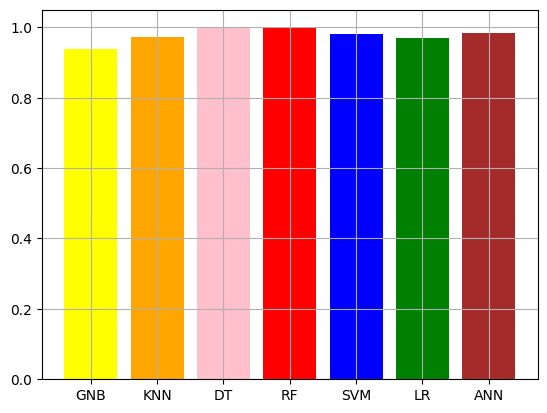

In [27]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb, acc_train_knn, acc_train_dt, acc_train_rf, acc_train_svm, acc_train_lr, acc_train_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

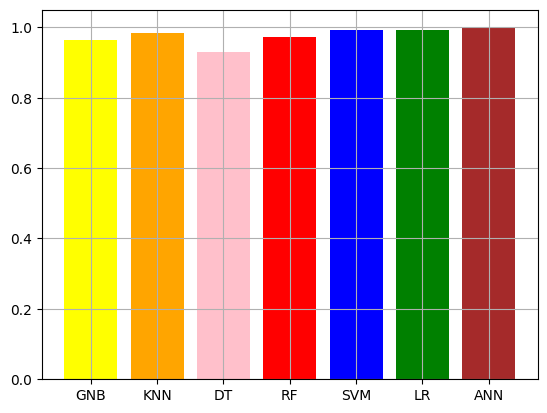

In [28]:
acc_test = [acc_test_gnb, acc_test_knn, acc_test_dt, acc_test_rf, acc_test_svm, acc_test_lr, acc_test_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, acc_test, color=colors)
plt.grid()
plt.show()

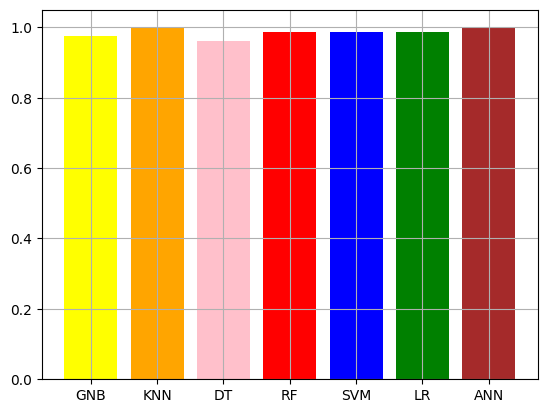

In [29]:
p = [p_gnb, p_knn, p_dt, p_rf, p_svm, p_lr, p_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, p, color=colors)
plt.grid()
plt.show()

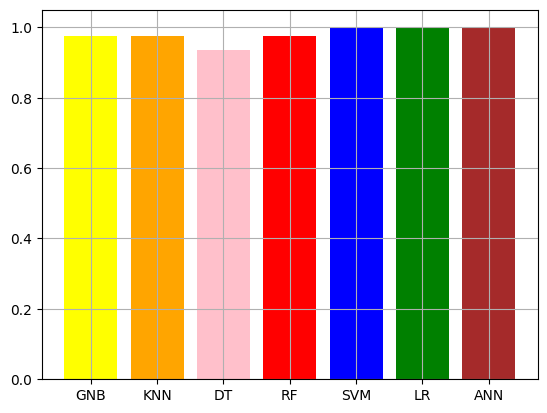

In [30]:
r = [r_gnb, r_knn, r_dt, r_rf, r_svm, r_lr, r_ann]
title = ['GNB', 'KNN', 'DT', 'RF', 'SVM', 'LR', 'ANN']
colors =  ['yellow', 'orange', 'pink', 'red', 'blue', 'green', 'brown']
plt.bar(title, r, color=colors)
plt.grid()
plt.show()